# Neural Systems 2021: Automated vocal segmentation project

Student names: 

Group:

## PART B: Supervised prediction of vocalizations

As introduced in Part A, we want to train a supervised algorithm on datasets of birdsong that have been labelled by experts. An intermediate aim would be to learn a function that maps the temporal context around time t to a binary output variable that predicts whether there is vocal activity at time t. 

### Load data and plot random spectrogram using python

In [52]:
# import useful libraries
import os
#from google.colab import drive
from scipy.io import loadmat
import random
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# mount your google drive
#drive.mount('/content/drive')
# make nicer plots
%config InlineBackend.figure_format = 'svg'

In [97]:
def plot_spectogram(Xs_train, example, SETindex=None, ons=None, offs=None, labels=None, colors=None):
    
    spec = Xs_train[example]
    plt.figure(figsize=(15,5))  
    plt.imshow(np.flip(spec, axis = 0))
    plt.yticks(np.linspace(0, 127, 5),np.flip(np.linspace(0,maxfreq,5)))
    xt = np.arange(spec.shape[1]*nonoverlap/fs)
    plt.xticks(xt/nonoverlap*fs,xt)
    plt.xlabel("Time [s]")
    plt.ylabel("Frequency [kHz]")
    
    
    ax = plt.gca()
    if type(SETindex) != type(None):
        indices = np.where(SETindex==example)
        on = ons[indices]
        off = offs[indices]
        col = colors[indices]
        l = labels[indices]
        
        for i in range(len(on)):
            ax.add_patch(matplotlib.patches.Rectangle((on[i], 0), off[i]-on[i], 15,linewidth=2,
                 edgecolor=col[i],
                 facecolor=col[i],                                     
                 fill = True))
            plt.text((on[i] + off[i])/2-5,-7,l[i],{'color':col[i], 'weight' : 'bold', 'size' : 15})

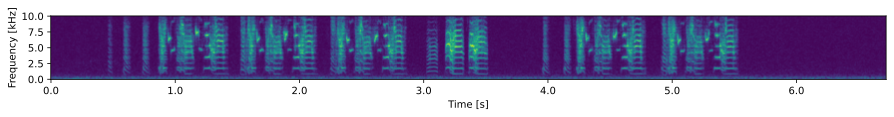

In [91]:
# recording parameters
maxfreq = 10 # maximal frequency in kHz
nonoverlap = 128 # samples per spectrogram column
fs = 32000 # sampling frequency in Hz

# load data; each element in Xs_train contains one spectrogram
#root_path = "/content/drive/MyDrive/AutoVocSegmentation_NeurSys2021/"
root_path = ""
train_dir = root_path + "train_dataset/spectrograms/"
birddata = "g17y2_train.mat"
Xs_train = loadmat(train_dir+birddata)["Xs_train"][0]
# plot random spectrogram
example = random.randint(0,len(Xs_train))
plot_spectogram(Xs_train, example)

### Predict segments from temporal context using a non-linear function

We pre-train a non-linear predictor, a neural net, on the task we tackled in Part A: predicting segments from their temporal context. 

*Task*: Introduce your approach here. Which function do you choose? Which hyperparameters/architectures do you want to screen?

(Note that in Part C you can get creative, so it is recommended to choose a simple network here)




In [ ]:
"""
    *Task*: 
    
    Write a helper function nn_song_stereotypy.py replacing the
    linear regressor with a feed-forward neural network (similar to 
    the pitch regression example with e.g. 3-4 layers).

    Explore the MSE on the training data for a number of configurations.

    Plot example spectrograms.
"""

### your code ##

### Inspect labelled data 
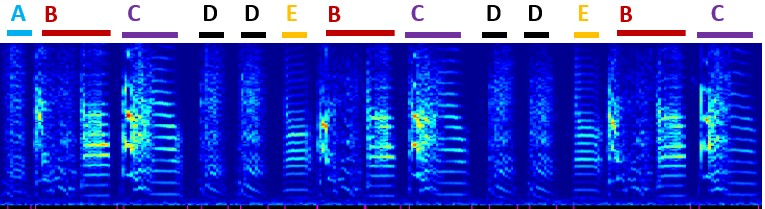

The annotation data structures contain relevant information including the annotations y with 

*   SETindex determining the corresponding spectrogram in Xs_train
*   onset of the annotated element in spectrogram columns (onset_columns)
*   offset of the annotated element in spectrogram columns (offset_columns)
*   and a cluster ID (distinct number for each syllable; clust).

In [88]:
train_dir = root_path + "train_dataset/annotations/"
birddata = "annotations_g17y2_train.mat"
annot = loadmat(train_dir+birddata)["annotations_train"][0]
# subtract 1, because in python everything starts with 0, instead of 1
SETindex = annot["y"][0]["SETindex"][0][0][0]-1
ons = annot["y"][0]["onset_columns"][0][0][0]-1
offs = annot["y"][0]["offset_columns"][0][0][0]-1
clust = annot["y"][0]["clust"][0][0][0]

alphabet = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
cols = ['cyan','red','violet','black','orange','green']
clusters = np.unique(clust)
lab = {}
marks = {}
for i in range(len(clusters)):
    lab[clusters[i]] = alphabet[i]
    marks[clusters[i]] = cols[i]
    
colors = np.array([marks[c] for c in clust])
labels = np.array([lab[c] for c in clust])    

"""
    *Task*: 

    1) Draw a random spectrogram
    2) Find all annotations for that spectrogram
    3) Plot the spectrogram and indicate the annotated segments (location
    and cluster membership)
"""

### your code ###

'\n    *Task*: \n\n    1) Draw a random spectrogram\n    2) Find all annotations for that spectrogram\n    3) Plot the spectrogram and indicate the annotated segments (location\n    and cluster membership)\n'

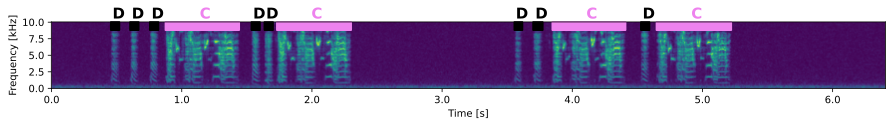

In [114]:
plot_spectogram(Xs_train,7,SETindex,ons,offs,labels,colors)

### Retrain the last layers to output a binary vocal detection variable
In simple words, we can say that the first layers of a feed-forward neural net are more concerned with feature extraction, while the last layers are concerned with decision-making. We assume that song stereotypy feature extraction is similar to our task. So we try to only retrain the last layers.

In [ ]:
"""
    *Task*: 
    
    Write a helper function transfer_nn_vocal_detector.py which
    - takes the pretrained model as an input
    - retrains the n last layers
    - is supervised by binary labels of spectrogram columns 
      (1=vocal / 0=non-vocal).

    Store the parameters of your model and report statistics 
    of the training process (accuracy over epochs, mse on training
    data,...)
    
    Plot an example spectrogram with true and predicted segments
"""

### your code ###

### The online variant

In [ ]:
"""
    *Task*: 
    
    Write a online variant as in Part A, using a non-linear 
    predictor.
"""

### your code ###

### Discussion
*Task*: Discuss your findings. How much smaller does the residual get compared when using a non-linear instead of a linear predictor (Part A)?